In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
# Connection to the database
conn = sqlite3.connect('rankings.db')

# Cursor to execute the queries
cursor = conn.cursor()

In [3]:
# Now to enable sql magic commands
%load_ext sql

In [4]:
%sql sqlite:///rankings.db

In [5]:
# First of all we will retrieve the database using pandas

df = pd.read_csv('rankings.csv')

In [6]:
# To read some rows
df.head(5)

,university,year,rank_display,score,country,city,region,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,100.0,United States,Cambridge,North America,Private,Very High,4.0,3730.0,M,3065.0
1,Stanford University,2017,2,98.7,United States,Stanford,North America,Private,Very High,3.0,3879.0,L,4725.0
2,Harvard University,2017,3,98.3,United States,Cambridge,North America,Private,Very High,5.0,5877.0,L,4646.0
3,University of Cambridge,2017,4,97.2,United Kingdom,Cambridge,Europe,Public,Very high,4.0,7925.0,L,5800.0
4,California Institute of Technology (Caltech),2017,5,96.9,United States,Pasadena,North America,Private,Very High,2.0,692.0,S,968.0


In [7]:
''' As read from excel, the data has missing columns in the rankings place so I want to change the database, currently if I group it
by rank_display it will show duplicate values also, I will get it into the format by using different functions'''
for i in range (2017,2023):
    dfPerYear = df[df['year'] == i].copy()
    uniNumber = dfPerYear.shape[0] # To get the number of rows from the data
    dfPerYear['rank_display'] = range(1,uniNumber + 1) # To iterate over the rankings of the university
    print(dfPerYear.tail()) # Lets see whether the rankings display are shown or not from the end

                                       university  year  rank_display  score  \
928                 Stockholm School of Economics  2017           929    NaN   
929                            Bocconi University  2017           930    NaN   
930  Université de Technologie de Compiègne (UTC)  2017           931    NaN   
931   Prague University of Economics and Business  2017           932    NaN   
932     WHU - Otto Beisheim School of Management   2017           933   69.6   

            country       city  region     type research_output  \
928          Sweden        NaN  Europe  Private       Very High   
929           Italy      Milan  Europe  Private       Very High   
930          France  Compiègne  Europe   Public       Very High   
931  Czech Republic     Prague  Europe   Public       Very High   
932         Germany  Vallendar  Europe  Private       Very High   

     student_faculty_ratio  international_students size  faculty_count  
928                    NaN                 

In [8]:
# Now that we know that the function has been applied properly we will use it on the original data frame
for i in range (2017,2023):
    dfPerYear = df[df['year'] == i].copy()
    uniNumber = dfPerYear.shape[0] # To get the number of rows from the data
    dfPerYear['rank_display'] = range(1,uniNumber + 1)
    # We will replace the column values and the row values with the appropriate values
    df.loc[df['year'] == i,'rank_display'] = dfPerYear['rank_display'].values

In [9]:
# As it can be seen from the output that no row in the dataset is empty row, that is, every row has a rank
df[df['rank_display'].isna() == True]['rank_display'].count()

0

In [10]:
# First we list columns of dataset
df.columns

Index(['university', 'year', 'rank_display', 'score', 'country', 'city',
       'region', 'type', 'research_output', 'student_faculty_ratio',
       'international_students', 'size', 'faculty_count'],
      dtype='object')

In [11]:
# We see the datatypes in df
df.dtypes

university                 object
year                        int64
rank_display               object
score                     float64
country                    object
city                       object
region                     object
type                       object
research_output            object
student_faculty_ratio     float64
international_students    float64
size                       object
faculty_count             float64
dtype: object

In [12]:
# From excel, it is found that international_students have null values and we set them equal to the average for their countries
df['international_students'].fillna(df.groupby(by = 'country')['international_students'].transform('mean'),inplace = True)
df[df['international_students'].isna() == True]

,university,year,rank_display,score,country,city,region,type,research_output,student_faculty_ratio,international_students,size,faculty_count
891,University of Nairobi,2017,892,NaN,Kenya,Nairobi,Africa,Public,Medium,12.0,NaN,XL,2492.0
1873,University of Nairobi,2018,941,NaN,Kenya,Nairobi,Africa,Public,Medium,12.0,NaN,XL,2492.0
2885,University of Nairobi,2019,976,NaN,Kenya,Nairobi,Africa,Public,Medium,12.0,NaN,XL,2492.0
3991,University of Nairobi,2020,1064,NaN,Kenya,Nairobi,Africa,Public,Medium,12.0,NaN,XL,2492.0
5160,University of Nairobi,2021,1164,NaN,Kenya,Nairobi,Africa,Public,Medium,12.0,NaN,XL,2492.0
6349,University of Nairobi,2022,1168,NaN,Kenya,Nairobi,Africa,Public,Medium,12.0,NaN,XL,2492.0
6441,Universidad Nacional Autónoma de Honduras (UNAH),2022,1260,NaN,Honduras,Tegucigalpa,Latin America,Public,Low,25.0,NaN,XL,3888.0


In [13]:
# Some universitites still have null values so we will set them equal to zero
df['international_students'].fillna(0,inplace = True)
df[df['international_students'].isna() == True]
# Now the dataset has no issue in the international students column

,university,year,rank_display,score,country,city,region,type,research_output,student_faculty_ratio,international_students,size,faculty_count


In [14]:
# We apply a similar concept to the student faculty ratio column
df['student_faculty_ratio'].fillna(df.groupby('country')['student_faculty_ratio'].transform('mean'),inplace = True)
df[df['student_faculty_ratio'].isna() == True]
# So now the student faculty ratio is also sorted

,university,year,rank_display,score,country,city,region,type,research_output,student_faculty_ratio,international_students,size,faculty_count


In [15]:
# We go for a same approach in the faculty count column
df['faculty_count'].fillna(df.groupby('country')['faculty_count'].transform('mean'),inplace = True)
df[df['faculty_count'].isna() == True]
# So now the faculty count is also sorted

,university,year,rank_display,score,country,city,region,type,research_output,student_faculty_ratio,international_students,size,faculty_count


In [16]:
# We can be interested in a number of things about this dataset.
# Questions : 
'''
Average university ranking per country, (lower is better)
Number of universities in top 500 per year per region
Cities with the most international students
Correlation between university score and size
Trends of international students per region over the years
Countries with the highest research outputs
Countries with most improved university rankings
Countries grouped by their population per university ( This data will have to be scraped)
'''

'\nAverage university ranking per country, (lower is better)\nNumber of universities in top 500 per year per region\nCities with the most international students\nCorrelation between university score and size\nTrends of international students per region over the years\nCountries with the highest research outputs\nCountries with most improved university rankings\nCountries grouped by their population per university ( This data will have to be scraped)\n'

In [17]:
# We will now start exploratory data analysis on the dataset

In [108]:
# We will now check average university ranking per country for the top 20 countries
dfAvgRank = df[['country','rank_display']].groupby(by = 'country').mean().reset_index()
dfAvgRank.sort_values(by = 'rank_display').head(20)
# Here we see that netherlands has the highest average rank, and surprisingly usa is not in the top 10 

,country,rank_display
56,Netherlands,157.961538
34,Hong Kong SAR,159.309524
74,Singapore,168.611111
83,Switzerland,176.272727
8,Belgium,264.6
57,New Zealand,267.625
69,Qatar,303.833333
23,Denmark,317.114286
82,Sweden,328.62069
12,Brunei,333.333333


In [19]:
# Lets now use folium in order to visualize the averaGe university ranking per country
import folium

In [105]:
# I found out that the geojson file has united states of america instead of united states
# So we rename it
dfAvgRank['country'] = dfAvgRank['country'].replace('United States','United States of America')
# # Lets create a folium map object
m = folium.Map(location = [0,0], zoom_start = 2, tiles="Stamen Terrain", attr = "OpenStreetMap")

folium.GeoJson(
    'countries.geojson',
    name='geojson',
    style_function=lambda feature: {
        'fillColor': 'white',  # Set the fill color to white
        'color': 'black',      
        'weight': 1,           
    }
).add_to(m)

folium.Choropleth(
    geo_data = 'countries.geojson',
    name='choropleth',
    data=dfAvgRank,
    columns=['country','rank_display'], 
    key_on='feature.properties.ADMIN',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average University Rankings(lower is better)'
).add_to(m)
m.save('averagePerCountry.html')

In [21]:
# Now we will answer the question of number of universitites in the top 500 per region per year
# This is a list to which we append all the data frames
yearList = []
for i in range (2017,2023):
    # We get the top 500 universities per year
    dfPerYear = df[df['year'] == i].head(500)
    # We then group this information per region
    dfCountPerRegion = dfPerYear[['region','rank_display','year']].groupby(by = ['region','year']).count().reset_index()
    # We then append it to the list
    yearList.append(dfCountPerRegion)
# We use pandas' concat function to store the ranks per year
top500RanksPerRegion = pd.concat(yearList).reset_index()
# top500RanksPerRegion.reset_index(inplace = True)
print(top500RanksPerRegion)

    index         region  year  rank_display
0       0         Africa  2017             4
1       1           Asia  2017           119
2       2         Europe  2017           211
3       3  Latin America  2017            20
4       4  North America  2017           115
5       5        Oceania  2017            31
6       0         Africa  2018             5
7       1           Asia  2018           117
8       2         Europe  2018           215
9       3  Latin America  2018            20
10      4  North America  2018           112
11      5        Oceania  2018            31
12      0         Africa  2019             4
13      1           Asia  2019           122
14      2         Europe  2019           212
15      3  Latin America  2019            17
16      4  North America  2019           112
17      5        Oceania  2019            33
18      0         Africa  2020             4
19      1           Asia  2020           123
20      2         Europe  2020           212
21      3 

In [22]:
# As you can see it has a column named index which we do not want so we want to drop it
top500RanksPerRegion = top500RanksPerRegion.drop('index',axis = 1)

In [23]:
# We also rename the rank_display column
top500RanksPerRegion.rename(columns = {'rank_display' : 'number of universities'}, inplace = True)
# We print out the resulting dataframe now, and it has the correct index
print(top500RanksPerRegion)

           region  year  number of universities
0          Africa  2017                       4
1            Asia  2017                     119
2          Europe  2017                     211
3   Latin America  2017                      20
4   North America  2017                     115
5         Oceania  2017                      31
6          Africa  2018                       5
7            Asia  2018                     117
8          Europe  2018                     215
9   Latin America  2018                      20
10  North America  2018                     112
11        Oceania  2018                      31
12         Africa  2019                       4
13           Asia  2019                     122
14         Europe  2019                     212
15  Latin America  2019                      17
16  North America  2019                     112
17        Oceania  2019                      33
18         Africa  2020                       4
19           Asia  2020                 

<Axes: xlabel='year', ylabel='number of universities'>

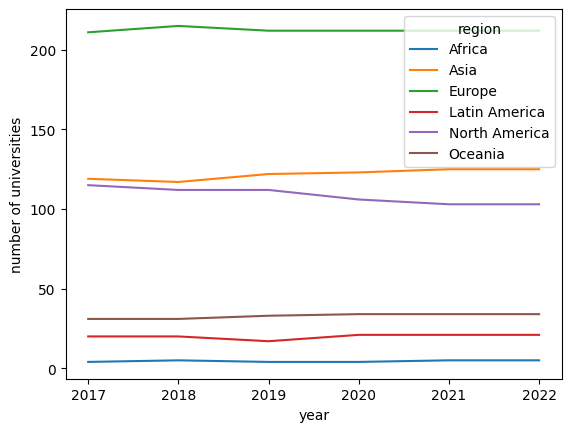

In [24]:
# Lets plot this data as a line plot for different regions
sns.lineplot(data = top500RanksPerRegion, x = 'year', y = 'number of universities', hue = 'region')

In [25]:
# Overall it can be seen that the asian universities are increasing in numbers in top 500 while the north american universities are decreasing 

In [26]:
# Now we want to see the cities with the most international students, so we calculate the total cities with the most international students on average
dfCitiesByStudents = df[['city','international_students']].groupby(by = 'city').sum().reset_index()
# Now we take the average by year for this dataset for this we just divide the international students by 5
dfCitiesByStudents['international_students'] = dfCitiesByStudents['international_students'] / 5

In [27]:
dfCitiesByStudents['international_students'] = dfCitiesByStudents['international_students'].astype('int64')

In [28]:
# We display the results of the top ten cities
dfCitiesByStudents.sort_values(ascending = False, by = 'international_students',inplace = True)
dfTop10CitiesForStudents = dfCitiesByStudents.head(10)
dfTop10CitiesForStudents

,city,international_students
442,London,91582
748,Sydney,67396
482,Melbourne,56173
580,Paris,41437
314,Hong Kong,41037
117,Buenos Aires,40352
537,New York City,33534
786,Toronto,33059
108,Brisbane,29924
506,Moscow,29662


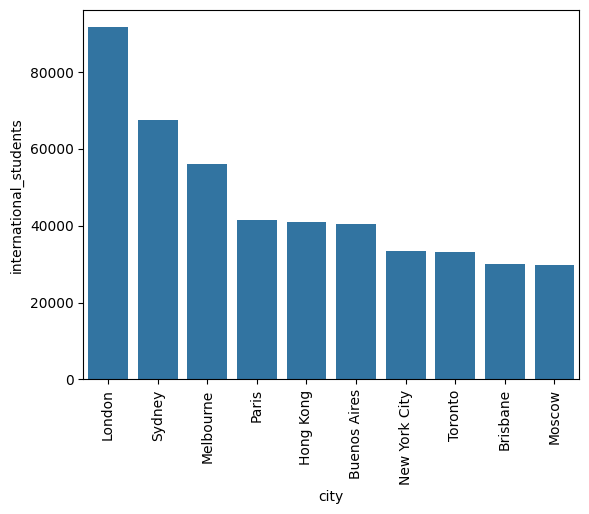

In [29]:
# Now to visualize this relation we will use a bar plot
sns.barplot(data = dfTop10CitiesForStudents, x = 'city', y = 'international_students') 
plt.xticks(rotation = 90)
plt.show()

In [30]:
# As evident, london is the most popular place for the students

In [31]:
# We might also be interested in the number of international students per region
dfRegionByStudents = df[['region','international_students']].groupby(by = 'region').sum().reset_index()
# TO take the average we divide it by 5
dfRegionByStudents['international_students'] = dfRegionByStudents['international_students'] / 5

In [32]:
dfRegionByStudents['international_students'] = dfRegionByStudents['international_students'].astype('int64')

In [33]:
# Now to sort the dataset
dfRegionByStudents.sort_values(ascending = False, by = 'international_students',inplace = True)

<Axes: xlabel='region', ylabel='international_students'>

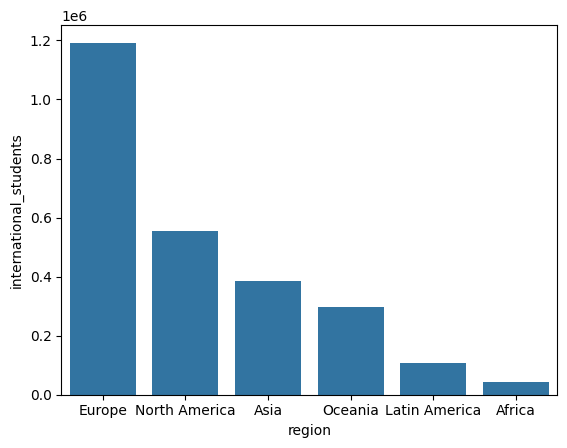

In [34]:
sns.barplot(data =  dfRegionByStudents, x = 'region', y = 'international_students')

In [35]:
# As ca be seen, europe has the highest number of international students

In [36]:
# We can also take a look at the most popular countries for the international students
dfCountryByStudents = df[['country','international_students']].groupby(by = 'country').sum().reset_index()
# TO take the average we divide it by 5
dfCountryByStudents['international_students'] = dfCountryByStudents['international_students'] / 5
# And we convert it into int type
dfCountryByStudents['international_students'] = dfCountryByStudents['international_students'].astype('int64')

In [37]:
# Now we will display the top ten countries
dfTopTenCountries = dfCountryByStudents.sort_values(by = 'international_students', ascending = False,ignore_index = True).head(10)
dfTopTenCountries

,country,international_students
0,United States,403664
1,United Kingdom,392906
2,Australia,266816
3,France,164078
4,Canada,150646
5,Germany,128491
6,Netherlands,80474
7,China (Mainland),76062
8,Argentina,58887
9,Japan,56170


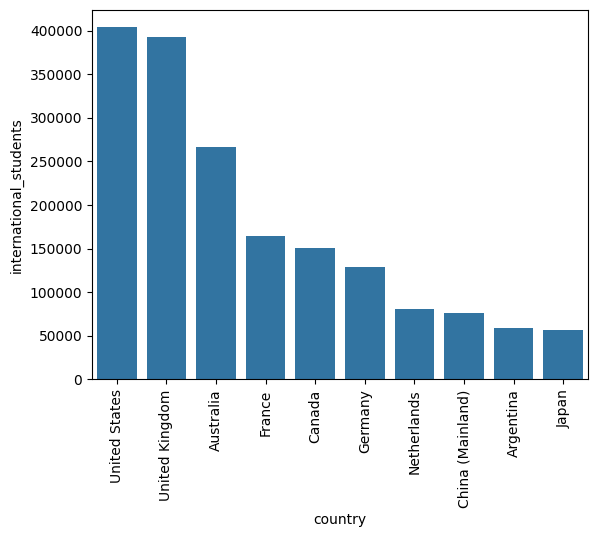

In [38]:
sns.barplot(x = 'country', y = 'international_students', data = dfTopTenCountries)
plt.xticks(rotation = 90)
plt.show()

In [39]:
# As can be seen America is the most popular country for students

In [40]:
# Now to see the universities in the top 100 for 2022 and see the sizes of each university
df[df['year'] == 2022].head(100).groupby(by = 'size').count().reset_index()
# df[df['year'] == 2022]['size'].unique()

,size,university,year,rank_display,score,country,city,region,type,research_output,student_faculty_ratio,international_students,faculty_count
0,L,48,48,48,48,48,47,48,48,48,48,48,48
1,M,14,14,14,14,14,14,14,14,14,14,14,14
2,S,3,3,3,3,3,3,3,3,3,3,3,3
3,XL,35,35,35,35,35,33,35,35,35,35,35,35


In [41]:
# Now we will see whether the trend of migration of international students has been changing over the years for a region

In [42]:
dfStudents = df[['international_students','region','year']].groupby(by = ['region','year']).sum().reset_index()

In [43]:
dfStudents

,region,year,international_students
0,Africa,2017,3.531308e+04
1,Africa,2018,3.775408e+04
2,Africa,2019,3.350208e+04
3,Africa,2020,1.555408e+04
4,Africa,2021,4.660408e+04
5,Africa,2022,5.396508e+04
6,Asia,2017,2.841952e+05
7,Asia,2018,2.915427e+05
8,Asia,2019,3.048092e+05
9,Asia,2020,3.148085e+05


<Axes: xlabel='year', ylabel='international_students'>

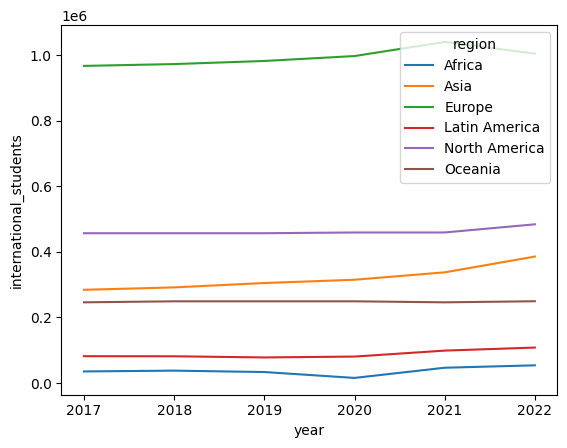

In [44]:
# Now we will make a line plot for this data
sns.lineplot(x = 'year', y = 'international_students', data = dfStudents, hue = 'region')

In [45]:
# This once again shows a rapid rise in asia's number of international students, alongwith an increase in their number of universities in the top 500 per year

In [46]:
# Now lets take a look at the countries with the most universities in the very high research segment in 2022

In [47]:
dfFor2022 = df[df['year'] == 2022]
dfCountriesByResearch = dfFor2022[['country','research_output','rank_display']].groupby(by = ['country','research_output']).count().reset_index()
# We will rename the rank display column as another column
dfCountriesByResearch = dfCountriesByResearch.rename(columns = {'rank_display' : 'number of universities'})
dfCountriesByResearch = dfCountriesByResearch[dfCountriesByResearch['research_output'] == 'Very High']
# Now lets sort the values
dfTop10ResearchCountries = dfCountriesByResearch.sort_values(by = 'number of universities', ignore_index = True, ascending = False).head(10)
dfTop10ResearchCountries

,country,research_output,number of universities
0,United States,Very High,150
1,United Kingdom,Very High,57
2,China (Mainland),Very High,53
3,Germany,Very High,39
4,Japan,Very High,35
5,Russia,Very High,35
6,Australia,Very High,33
7,India,Very High,30
8,Italy,Very High,29
9,South Korea,Very High,28


In [48]:
# Here as you can see america has the highest research output out of all the countries of the globe

In [49]:
# Another aspect interesting to look at will be the change in the resarch output of the regions per year

In [50]:
# A list to store all the values
dfResearchTrends = []
for i in range(2017,2023):
    dfForEveryYear = df[df['year'] == i]
    dfCountriesByResearch = dfForEveryYear[['region','research_output','rank_display','year']].groupby(by = ['region','research_output','year']).count().reset_index()
    # We will rename the rank display column as another column
    dfCountriesByResearch = dfCountriesByResearch.rename(columns = {'rank_display' : 'number of universities'})
    dfCountriesByResearch = dfCountriesByResearch[dfCountriesByResearch['research_output'] == 'Very High']
    # Now we will append this to here
    dfResearchTrends.append(dfCountriesByResearch)
# Now lets cocnatentate all this to one data frame
dfResearchPerYear = pd.concat(dfResearchTrends, ignore_index = True)
# Lets display it
dfResearchPerYear

,region,research_output,year,number of universities
0,Africa,Very High,2017,9
1,Asia,Very High,2017,169
2,Europe,Very High,2017,286
3,Latin America,Very High,2017,19
4,North America,Very High,2017,163
5,Oceania,Very High,2017,39
6,Africa,Very High,2018,10
7,Asia,Very High,2018,183
8,Europe,Very High,2018,302
9,Latin America,Very High,2018,19


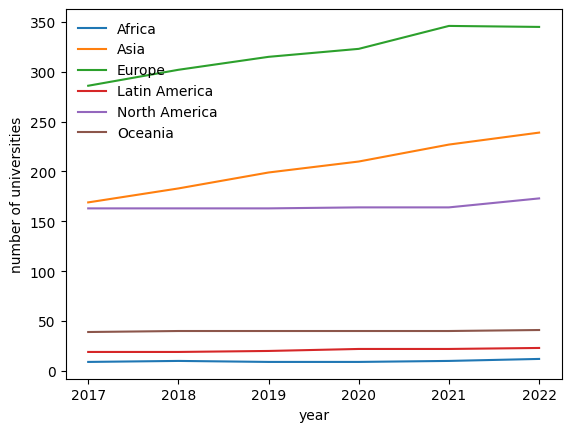

In [51]:
# Now we will use a lineplot to analyze this data
ax = sns.lineplot(x = 'year', y = 'number of universities', hue = 'region',data = dfResearchPerYear)
legend = ax.legend()
# legend.set_alpha(0)
legend.set_frame_on(False)
plt.show()

In [52]:
# Once again it can be seen that the asian universities have increased substantially in the very high research segment

In [53]:
# Now we will see how the average rank per country has improved over the years

In [54]:
# First for the ranking of 2017
startRank = df[df['year'] == 2017][['country','rank_display']].groupby(by = 'country').mean().reset_index()

In [55]:
startRank

,country,rank_display
0,Argentina,573.625
1,Australia,381.685714
2,Austria,451.285714
3,Azerbaijan,750.666667
4,Bahrain,667.5
...,...,...
76,United Arab Emirates,537.833333
77,United Kingdom,355.780822
78,United States,402.748387
79,Uruguay,717.0


In [56]:
endRank = df[df['year'] == 2022][['country','rank_display']].groupby(by = 'country').mean().reset_index()

In [57]:
endRank

,country,rank_display
0,Argentina,858.333333
1,Armenia,998.0
2,Australia,412.236842
3,Austria,412.0
4,Azerbaijan,1012.5
...,...,...
92,United Kingdom,500.577778
93,United States,544.418079
94,Uruguay,659.0
95,Venezuela,918.8


In [58]:
# Now we will merge the two using the merge method of pandas
dfCombined = pd.merge(startRank,endRank,on = 'country')

In [59]:
# This is the combined dataframe
dfCombined

,country,rank_display_x,rank_display_y
0,Argentina,573.625,858.333333
1,Australia,381.685714,412.236842
2,Austria,451.285714,412.0
3,Azerbaijan,750.666667,1012.5
4,Bahrain,667.5,766.5
...,...,...,...
76,United Arab Emirates,537.833333,553.7
77,United Kingdom,355.780822,500.577778
78,United States,402.748387,544.418079
79,Uruguay,717.0,659.0


In [60]:
# Now we will rename the columns
dfCombined.rename(inplace = True, columns = {"rank_display_x":"2017 rank","rank_display_y":"2022 rank"})

In [61]:
dfCombined

,country,2017 rank,2022 rank
0,Argentina,573.625,858.333333
1,Australia,381.685714,412.236842
2,Austria,451.285714,412.0
3,Azerbaijan,750.666667,1012.5
4,Bahrain,667.5,766.5
...,...,...,...
76,United Arab Emirates,537.833333,553.7
77,United Kingdom,355.780822,500.577778
78,United States,402.748387,544.418079
79,Uruguay,717.0,659.0


In [62]:
# Now we will make a new column to take the improvement in ranks
dfCombined['improvement'] = dfCombined['2017 rank'] - dfCombined['2022 rank']

In [63]:
# This is the new column for the data
dfCombined

,country,2017 rank,2022 rank,improvement
0,Argentina,573.625,858.333333,-284.708333
1,Australia,381.685714,412.236842,-30.551128
2,Austria,451.285714,412.0,39.285714
3,Azerbaijan,750.666667,1012.5,-261.833333
4,Bahrain,667.5,766.5,-99.0
...,...,...,...,...
76,United Arab Emirates,537.833333,553.7,-15.866667
77,United Kingdom,355.780822,500.577778,-144.796956
78,United States,402.748387,544.418079,-141.669692
79,Uruguay,717.0,659.0,58.0


In [64]:
# Now we will sort it by the value of the imporvement
dfCombined.sort_values(by = 'improvement', inplace = True, ignore_index = True, ascending = False)

In [65]:
# Lets convert the value to an integer
dfCombined['improvement'] = dfCombined['improvement'].astype('int64')

In [66]:
# Lets take the top 10 msot improved countries
dfTop10 = dfCombined.head(10)
dfTop10

,country,2017 rank,2022 rank,improvement
0,Qatar,393.0,225.0,168
1,Sweden,329.0,182.0,147
2,Denmark,330.666667,194.6,136
3,Oman,461.0,369.0,92
4,Norway,370.2,279.0,91
5,Cuba,805.0,718.666667,86
6,Bulgaria,674.0,597.0,77
7,Uruguay,717.0,659.0,58
8,Macau SAR,545.0,497.5,47
9,Austria,451.285714,412.0,39


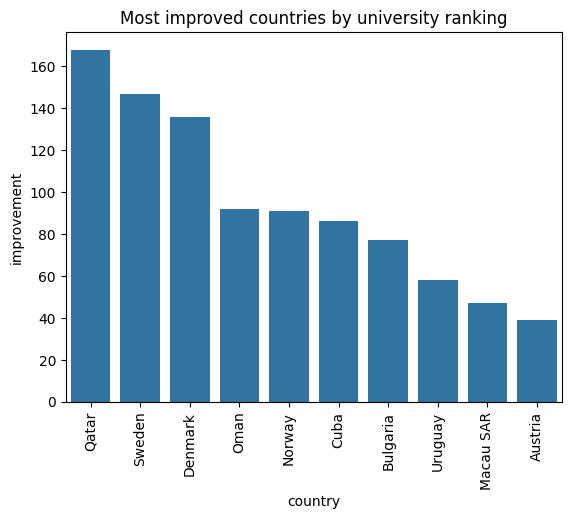

In [67]:
# Now lets visualize the data as a bar chart
sns.barplot(data = dfTop10, x = 'country', y = 'improvement')
plt.xticks(rotation = 90)
plt.title('Most improved countries by university ranking')
plt.show()

In [68]:
# Now we will scrap the data of the population to find out the number of people per university in 2022 (The lower the value the better)
from bs4 import BeautifulSoup
import requests

In [81]:
url = "https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population"
value = requests.get(url)

In [82]:
# We will now check for the status code
value.status_code

200

In [83]:
# This is the content
htmlValue = value.content

In [84]:
# We will create a beautiful soup object
soupObject = BeautifulSoup(htmlValue,'html.parser')

In [85]:
country = soupObject.find_all('a',{'title':True,'href':True,'class':False})

In [86]:
# This is the list of countries
countryNames = country[56:297]
countryNames

[<a href="/wiki/China" title="China">China</a>,
 <a href="/wiki/India" title="India">India</a>,
 <a href="/wiki/United_States" title="United States">United States</a>,
 <a href="/wiki/Indonesia" title="Indonesia">Indonesia</a>,
 <a href="/wiki/Pakistan" title="Pakistan">Pakistan</a>,
 <a href="/wiki/Nigeria" title="Nigeria">Nigeria</a>,
 <a href="/wiki/Brazil" title="Brazil">Brazil</a>,
 <a href="/wiki/Bangladesh" title="Bangladesh">Bangladesh</a>,
 <a href="/wiki/Russia" title="Russia">Russia</a>,
 <a href="/wiki/Mexico" title="Mexico">Mexico</a>,
 <a href="/wiki/Japan" title="Japan">Japan</a>,
 <a href="/wiki/Philippines" title="Philippines">Philippines</a>,
 <a href="/wiki/Ethiopia" title="Ethiopia">Ethiopia</a>,
 <a href="/wiki/Egypt" title="Egypt">Egypt</a>,
 <a href="/wiki/Vietnam" title="Vietnam">Vietnam</a>,
 <a href="/wiki/Democratic_Republic_of_the_Congo" title="Democratic Republic of the Congo">DR Congo</a>,
 <a href="/wiki/Turkey" title="Turkey">Turkey</a>,
 <a href="/wiki/

In [87]:
value = soupObject.find_all('a',string = 'Pitcairn Islands')

In [88]:
country.index(value[0])

296

In [89]:
print(soupObject.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of countries and dependencies by population - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-me

In [90]:
pop = soupObject.find_all("td",{'style':True})
populations = pop[:481]

In [91]:
# Now lets find index of the last population value which is 47
value = soupObject.find_all("td",string = "47")
pop.index(value[0])

480

In [92]:
populations
# Now We Will append only the populations from the data

[<td style="text-align:right">1,411,750,000</td>,
 <td style="text-align:right;font-size:inherit"><span data-sort-value="7,001,174,755,101,475,000♠" style="display:none"></span>17.5%</td>,
 <td style="text-align:right">1,392,329,000</td>,
 <td style="text-align:right;font-size:inherit"><span data-sort-value="7,001,172,351,050,597,000♠" style="display:none"></span>17.2%</td>,
 <td style="text-align:right">334,233,854</td>,
 <td style="text-align:right;font-size:inherit"><span data-sort-value="7,000,413,735,229,836,000♠" style="display:none"></span>4.1%</td>,
 <td style="text-align:right">279,118,866</td>,
 <td style="text-align:right;font-size:inherit"><span data-sort-value="7,000,345,510,506,473,000♠" style="display:none"></span>3.5%</td>,
 <td style="text-align:right">241,499,431</td>,
 <td style="text-align:right;font-size:inherit"><span data-sort-value="7,000,298,942,855,113,000♠" style="display:none"></span>3.0%</td>,
 <td style="text-align:right">216,783,400</td>,
 <td style="text

In [93]:
#We will make a new list and we will append to it only if the modulo is 0 (To get only the population data)
populationsFinal = []
for i in range(len(populations)):
    if (i % 2 == 0):
        populationsFinal.append(populations[i])

In [94]:
# Now we will display the results
populationsFinal

[<td style="text-align:right">1,411,750,000</td>,
 <td style="text-align:right">1,392,329,000</td>,
 <td style="text-align:right">334,233,854</td>,
 <td style="text-align:right">279,118,866</td>,
 <td style="text-align:right">241,499,431</td>,
 <td style="text-align:right">216,783,400</td>,
 <td style="text-align:right">203,062,512</td>,
 <td style="text-align:right">169,828,911</td>,
 <td style="text-align:right">146,424,729</td>,
 <td style="text-align:right">129,406,736</td>,
 <td style="text-align:right">124,310,000</td>,
 <td style="text-align:right">112,892,781</td>,
 <td style="text-align:right">107,334,000</td>,
 <td style="text-align:right">104,462,545</td>,
 <td style="text-align:right">100,000,000</td>,
 <td style="text-align:right">95,370,000</td>,
 <td style="text-align:right">85,279,553</td>,
 <td style="text-align:right">84,482,267</td>,
 <td style="text-align:right">84,038,000</td>,
 <td style="text-align:right">68,263,022</td>,
 <td style="text-align:right">68,221,000<

In [95]:
countries = []
for country in countryNames:
    countries.append(country.text)
countries

['China',
 'India',
 'United States',
 'Indonesia',
 'Pakistan',
 'Nigeria',
 'Brazil',
 'Bangladesh',
 'Russia',
 'Mexico',
 'Japan',
 'Philippines',
 'Ethiopia',
 'Egypt',
 'Vietnam',
 'DR Congo',
 'Turkey',
 'Germany',
 'Iran',
 'Thailand',
 'France',
 'United Kingdom',
 'South Africa',
 'Tanzania',
 'Italy',
 'Myanmar',
 'Colombia',
 'Kenya',
 'South Korea',
 'Spain',
 'Argentina',
 'Uganda',
 'Algeria',
 'Iraq',
 'Sudan',
 'Ukraine',
 'Canada',
 'Poland',
 'Morocco',
 'Uzbekistan',
 'Afghanistan',
 'Peru',
 'Malaysia',
 'Angola',
 'Mozambique',
 'Saudi Arabia',
 'Yemen',
 'Ghana',
 'Ivory Coast',
 'Nepal',
 'Venezuela',
 'Cameroon',
 'Madagascar',
 'Australia',
 'North Korea',
 'Niger',
 'Taiwan',
 'Syria',
 'Mali',
 'Burkina Faso',
 'Sri Lanka',
 'Malawi',
 'Kazakhstan',
 'Chile',
 'Zambia',
 'Romania',
 'Senegal',
 'Somalia',
 'Guatemala',
 'Netherlands',
 'Chad',
 'Cambodia',
 'Ecuador',
 'Zimbabwe',
 'Guinea',
 'South Sudan',
 'Rwanda',
 'Burundi',
 'Benin',
 'Bolivia',
 'Tuni

In [96]:
population = []
for populationFinal in populationsFinal:
    population.append(int(populationFinal.text.replace(',','')))

In [97]:
population

[1411750000,
 1392329000,
 334233854,
 279118866,
 241499431,
 216783400,
 203062512,
 169828911,
 146424729,
 129406736,
 124310000,
 112892781,
 107334000,
 104462545,
 100000000,
 95370000,
 85279553,
 84482267,
 84038000,
 68263022,
 68221000,
 67026292,
 62027503,
 61741120,
 58776233,
 55770232,
 52215503,
 51526000,
 51439038,
 48345223,
 46654581,
 45562000,
 45400000,
 43324000,
 41984500,
 41130432,
 40528396,
 37677000,
 37022000,
 36599764,
 34262840,
 33396698,
 33379500,
 33086278,
 32419747,
 32175224,
 31888698,
 30832019,
 29389150,
 29164578,
 28302000,
 28088845,
 26923353,
 26461912,
 25660000,
 25369415,
 23399654,
 22923000,
 22395489,
 22185654,
 22037000,
 21507723,
 20000000,
 19960889,
 19610769,
 19051562,
 18275743,
 18143379,
 17602431,
 17590000,
 17414717,
 17091464,
 16938986,
 15178979,
 13261638,
 13249924,
 13246394,
 12837740,
 12606998,
 12006031,
 11850232,
 11781559,
 11772639,
 11743017,
 11302000,
 11089511,
 10882235,
 10760028,
 10558012,
 104

In [98]:
data = [{'Country': countries[i], 'Population': population[i]} for i in range(241)]
dfCountriesPop = pd.DataFrame(data)
# Now lets extract the text values from each

In [99]:
# This is the population per country data 
dfCountriesPop.rename(columns = {'Country':'country'}, inplace = True)
dfCountriesPop

,country,Population
0,China,1411750000
1,India,1392329000
2,United States,334233854
3,Indonesia,279118866
4,Pakistan,241499431
...,...,...
236,Niue,1689
237,Tokelau,1647
238,Vatican City,764
239,Cocos (Keeling) Islands,593


In [100]:
# Now lets join this on the original data frame to generate a new one
dfCountriesTotalUni = df[df['year'] == 2022][['country','rank_display']].groupby(by = 'country').count().reset_index()
dfMerged = pd.merge(dfCountriesTotalUni,dfCountriesPop,on = 'country')

In [101]:
dfMerged

,country,rank_display,Population
0,Argentina,24,46654581
1,Armenia,1,2981200
2,Australia,38,26461912
3,Austria,8,9154514
4,Azerbaijan,2,10151517
...,...,...,...
86,United Kingdom,90,67026292
87,United States,177,334233854
88,Uruguay,4,3444263
89,Venezuela,5,28302000


In [ ]:
# Now that we have merged them, we will change the name of the column rank_display to the number of universities
dfMerged.rename(columns = {'rank_display':'number of universities'}, inplace = True)

In [ ]:
# We make a new column showing the number of universities per population
dfMerged['Population per Uni'] = dfMerged['Population'] / dfMerged['number of universities']

In [ ]:
dfMerged

In [ ]:
# Now lets see the countries with the lowest values of this parameter i.e those that have the more universities for their population
dfMerged.sort_values(by = 'Population per Uni', inplace = True, ignore_index = True)
dfMostUnis = dfMerged.head(10)

In [ ]:
# Now we will make a barplot out of this
sns.barplot(x = 'country', y = 'Population per Uni', data = dfMostUnis)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Lets offload the data into a csv file
# df.to_csv("cleanData.csv")

In [ ]:
# dfMerged.to_csv("merged.csv")

In [71]:
dfTop10CitiesForStudents.to_csv('Top 10 Cities For Students.csv')

In [72]:
dfResearchPerYear.to_csv('High Research Unis.csv')

In [76]:
dfTopTenCountries.to_csv('Top 10 Countries for Students.csv')

In [77]:
dfTop10.to_csv('Top 10 Most Improved Countries.csv')

In [78]:
top500RanksPerRegion.to_csv('Number of Universities Per Region in the top 500.csv')

In [80]:
dfAvgRank.to_csv("Average rank by country.csv")